## Airplane crashes since 1908 data analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "/kaggle/input/airplane-crashes-since-1908/Airplane_Crashes_and_Fatalities_Since_1908.csv")

pd.reset_option("display.max_rows")
pd.reset_option('max_colwidth')


We observe that there are many missing values for some columns (Time, Flight #, Route)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [3]:
df.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [4]:
df.tail(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5258,04/09/2009,07:00,"Near Wamena, Indonesia",Aviastar Mandiri,NaN,Jayapura - Wamena,British Aerospace BAe-146-300,PK-BRD,E3189,6.0,6.0,0.0,The cargo plane crashed into Gunung Pike mount...
5259,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,11.0,0.0,The passenger plane crashed in poor weather in...
5260,04/17/2009,15:32,"Canaima National Park, Venezuela",Aerotuy airline,NaN,Canaima - Porlamar,Cessna 208B Grand Caravan,YV-1181,208B-0695,11.0,1.0,0.0,"The plane, carrying 9 tourists, crashed 5 mile..."
5261,04/29/2009,06:00,"Massamba, DemocratiRepubliof Congo",Bako Air,NaN,"Bangui, CAR- Brazzaville, Congo - Harare, Zimb...",Boeing B-737-200,TL-ADM,22264/753,7.0,7.0,0.0,Crashed while en route on a ferrying flight. T...
5262,05/03/2009,12:00,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,NaN,Patrol,Mi-35,EV08114,NaN,18.0,18.0,0.0,The helicopter was patrolling along the Venezu...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [5]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


I removed these columns because they are of no use to me.

In [6]:
df.drop(["Flight #", "Registration", "cn/In"], axis=1, inplace=True)

Time and date formatting, some values in Time are not correctly structured

In [7]:
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y')

df['Time'] = df['Time'].str.extract(r"([0-9]{1,2}:[0-9]{2})")

df["Time"] = pd.to_datetime(df["Time"], format='%H:%M')

df["Time"].fillna("00:00", inplace=True)


In [8]:
df["Location"].fillna("Unknown", inplace=True)
df["Operator"].fillna("Unknown", inplace=True)
df["Route"].fillna("Unknown", inplace=True)
df["Type"].fillna("Unknown", inplace=True)
df["Summary"].fillna("Unknown", inplace=True)


def drop_missing_data_rows(df: pd.DataFrame):

    missing_data_rows = pd.isna(df["Aboard"]) | pd.isna(
        df["Fatalities"]) | pd.isna(df["Ground"])

    return df.drop(df[missing_data_rows].index, axis=0)


df = drop_missing_data_rows(df)


The Aboard, Fatalities and Ground columns are downcasted as they are supposed to be integer values

In [9]:

def downcast_float_columns(df: pd.DataFrame):

    cols = df.select_dtypes(include=['float64']).columns
    df[cols] = df[cols].apply(
        pd.to_numeric, downcast='integer', errors='coerce')
    return df


df = downcast_float_columns(df)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5236 entries, 0 to 5267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5236 non-null   datetime64[ns]
 1   Time        5236 non-null   datetime64[ns]
 2   Location    5236 non-null   object        
 3   Operator    5236 non-null   object        
 4   Route       5236 non-null   object        
 5   Type        5236 non-null   object        
 6   Aboard      5236 non-null   int16         
 7   Fatalities  5236 non-null   int16         
 8   Ground      5236 non-null   int16         
 9   Summary     5236 non-null   object        
dtypes: datetime64[ns](2), int16(3), object(5)
memory usage: 357.9+ KB


Here, there is a simple filtering according to the Operator column and a specific string to divide the dataset according to civil or military flights. It is possible that some rows are classified as civil when they should be classified as military.

In [11]:
from enum import Enum


class Passenger(Enum):
    MILITARY = "Military"
    CIVIL = "Civil"


df["passenger_type"] = np.where(df["Operator"].str.contains(
    r"Military", regex=True), Passenger.MILITARY.value, Passenger.CIVIL.value)


I add here a false data for each category (civilian, military) with a common first crash date. This will make it easier for me to sample and plot the curves according to the dates later.

In [12]:
def add_begin_date_column(df: pd.DataFrame, passenger_type: Passenger):

    row = {"Date": pd.to_datetime("1900-01-01"),
           "Time":  pd.to_datetime("00:00"),
           "Location": "Unknown",
           "Operator": "Unknown",
           "Route": "Unknown",
           "Type": "Unknown",
           "Aboard": 0,
           "Fatalities": 0,
           "Ground": 0,
           "Summary": "Unknown",
           "passenger_type": passenger_type.value}

    return df.append(row, ignore_index=True)


df = add_begin_date_column(df, Passenger.MILITARY)
df = add_begin_date_column(df, Passenger.CIVIL)


In [13]:
from typing import List


class Color(Enum):
    DEFAULT_BLUE = '#1f77b4'
    DEFAULT_ORANGE = '#ff7f0e'
    DEFAULT_GREEN = '#2ca02c'
    DEFAULT_RED = '#d62728'


def bar_plot(df: pd.DataFrame, x: str, y: List[str], ax, x_label: str, color: List[Color], nbGroupedBars=1, isHorizontal: bool = False):

    ax = df.plot.barh(x=x, y=y, ax=ax, color=color,
                      edgecolor='white', linewidth=1.4) if isHorizontal else df.plot.bar(x=x, y=y, ax=ax, color=color,
                                                                                         edgecolor='white', linewidth=1.4)

    for i in range(nbGroupedBars):
        ax.bar_label(ax.containers[i], label_type='edge', fontsize=8)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xlabel(x_label)


This histogram gives the cumulative values of the columns (Aboard, Fatalities, Ground) by category (civilian, military).

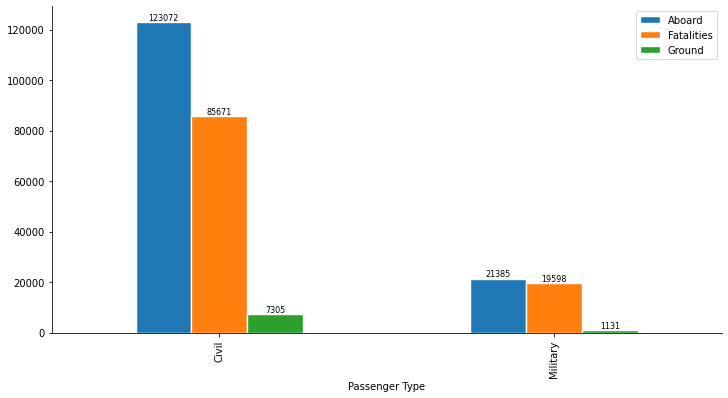

In [14]:
def bar_plot_passenger_type(df: pd.DataFrame):

    fig, ax = plt.subplots(ncols=1, figsize=(12, 6))

    df_group_by_passenger_type = df.groupby(by="passenger_type").sum()

    bar_plot(df_group_by_passenger_type, None,  ["Aboard", "Fatalities", "Ground"],
             ax, "Passenger Type", [Color.DEFAULT_BLUE.value, Color.DEFAULT_ORANGE.value, Color.DEFAULT_GREEN.value], nbGroupedBars=3)


bar_plot_passenger_type(df)


This pie chart gives the proportion of the cumulative values of the columns (Aboard, Fatalities, Ground) by category (civilian, military).

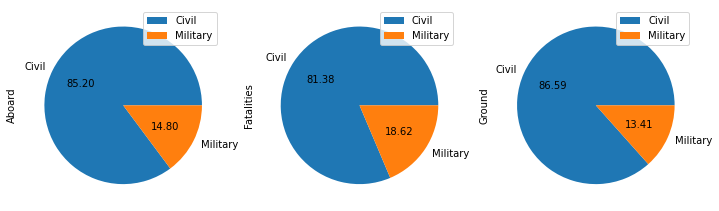

In [15]:

def autopct(pct: float):
    return ('%.2f' % pct) if pct > 10 else ''


def plot_passenger_type_pie(df: pd.DataFrame):

    df_group_by_passenger_type = df.groupby(by="passenger_type").sum()
    df_group_by_passenger_type.plot.pie(
        subplots=True, figsize=(12, 6), autopct=autopct)


plot_passenger_type_pie(df)


In [16]:
def split_df_by_passenger_type(df: pd.DataFrame):

    df_passenger_type_military = df.loc[df["passenger_type"]
                                        == Passenger.MILITARY.value]
    df_passenger_type_civil = df.loc[df["passenger_type"]
                                     == Passenger.CIVIL.value]

    return df_passenger_type_military, df_passenger_type_civil


These curves show the evolution of the number of deaths (fatalities, ground) since 1908 for the categories (civil, military) by year. The resample function is very useful, because it allows to group all the data of the same year, day or other. However, the columns must be formatted with the object type in datetime beforehand. For the military category, we can see a peak during the Second World War. For the civilian category, we can see a progressive increase of the number of fatalities until the 80's and then a decrease. We can also observe this huge peak during September 11, 2001 for deaths caused on the ground.
 **Warning Alert**, these curves seem to show worrying results during the 70's-80's, this remark has already been made on other projects on Kaggle, but if we wanted to be more honest, we should compare these data to the number of annual flights. I also chose to distinguish between deaths at passenger level and those on the ground so that it would be less ambiguous later on in my curves.


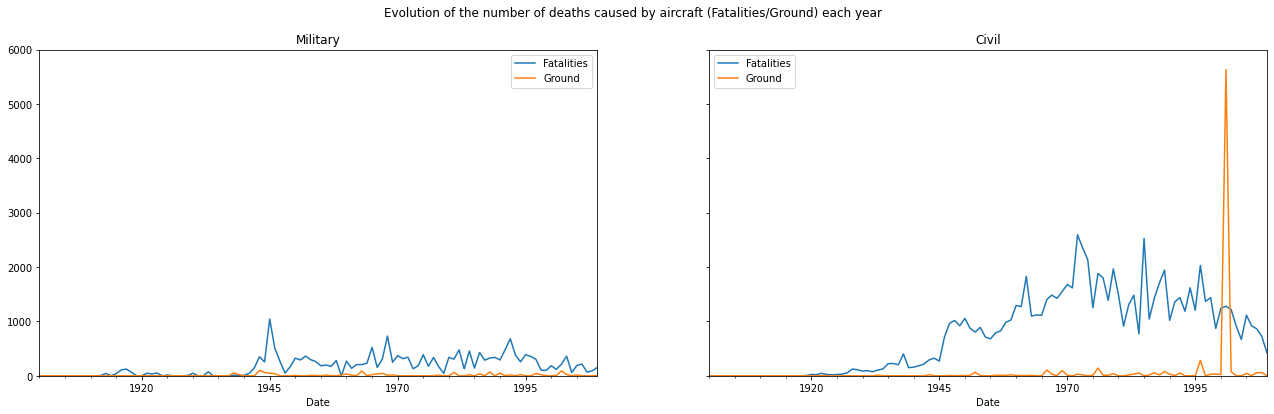

In [17]:


def get_resampled_data(df: pd.DataFrame, rule: str):

    return df.resample(rule, on='Date').sum()


def plot_evolution_of_deaths_each_year(df: pd.DataFrame,  ylim_top: int = 6000):

    def start_plotting(df_passenger_type_military: pd.DataFrame, df_passenger_type_civil: pd.DataFrame, ylim_bottom: int = 0, ylim_top: int = 6000):

        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(22, 6), sharey=True)

        title = "Evolution of the number of deaths caused by aircraft (Fatalities/Ground) each year"

        fig.suptitle(title)

        ax1.set_ylim(ylim_bottom, ylim_top)

        ax2.set_ylim(ylim_bottom, ylim_top)

        df_passenger_type_military.plot(y=["Fatalities", "Ground"],
                                        ax=ax1, title="Military")

        df_passenger_type_civil.plot(y=["Fatalities", "Ground"],
                                     ax=ax2, title="Civil")

    df_passenger_type_military, df_passenger_type_civil = split_df_by_passenger_type(
        df)

    df_passenger_type_military_resampled = get_resampled_data(
        df_passenger_type_military, "Y")

    df_passenger_type_civil_resampled = get_resampled_data(
        df_passenger_type_civil, "Y")

    start_plotting(df_passenger_type_military_resampled,
                   df_passenger_type_civil_resampled, ylim_top=ylim_top)


plot_evolution_of_deaths_each_year(df)


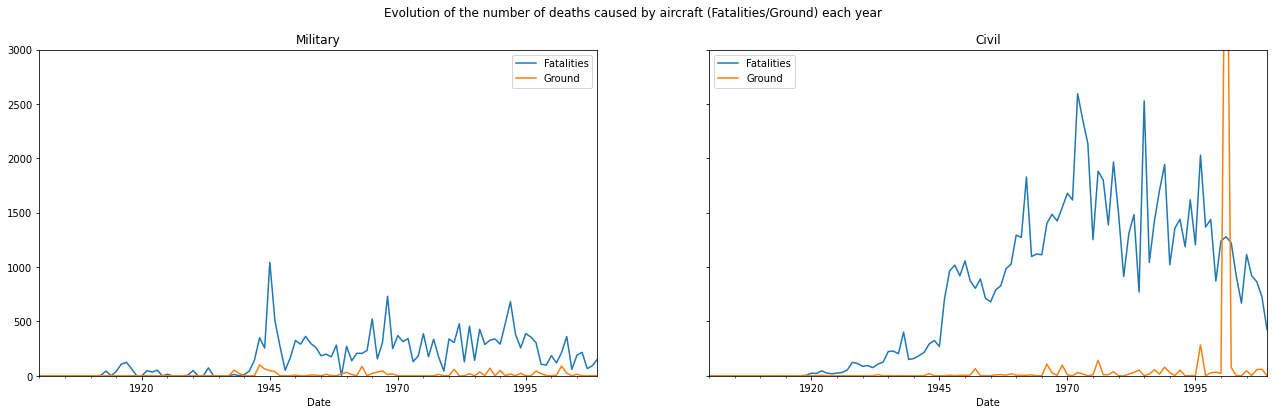

In [18]:
plot_evolution_of_deaths_each_year(df, ylim_top=3000)


These histograms show the evolution of the number of deaths (fatalities, ground) since 1908 for the categories (civilian, military) by decade. We can see in particular the number of fatalities for the period 1970-1980.

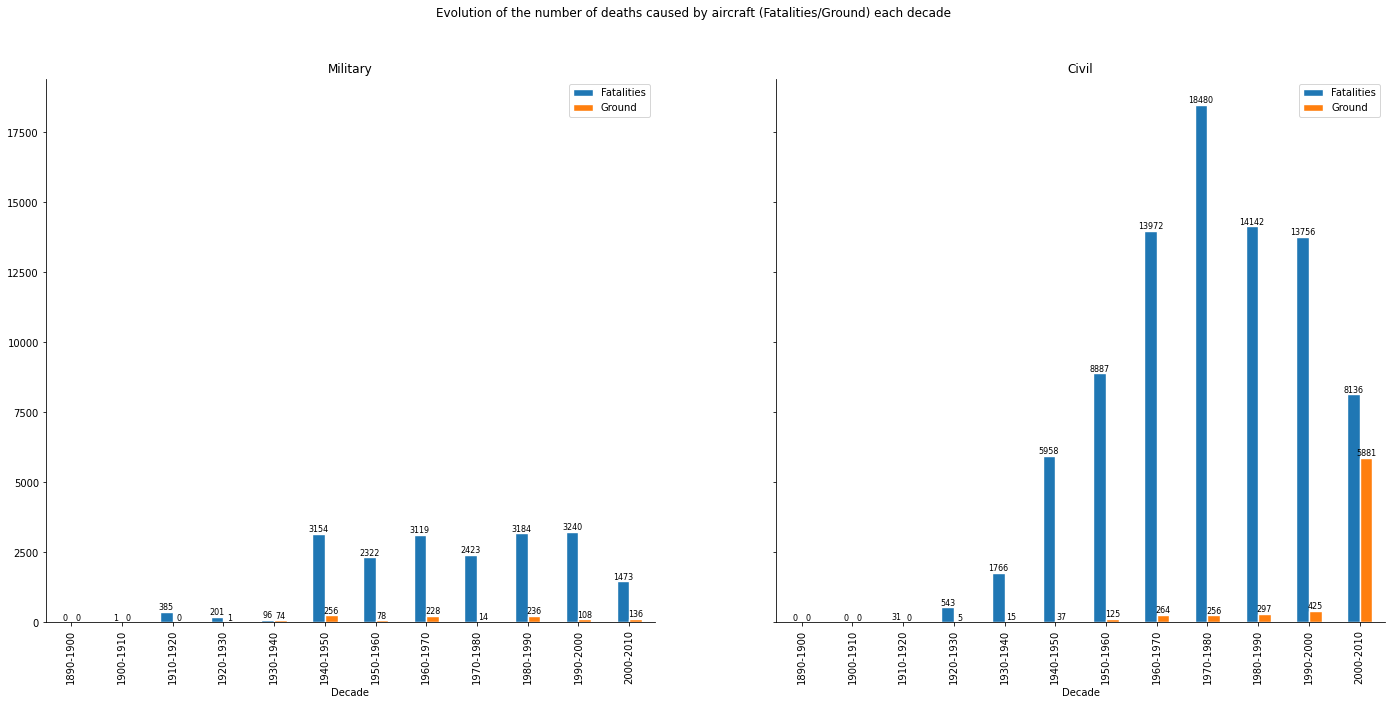

In [19]:


def add_decades_interval_column(df: pd.DataFrame):

    df["end"] = df.index
    df["end"] = df["end"].dt.strftime("%Y")
    df["start"] = (df["end"].astype(int) - 10).astype(str)

    df["interval"] = df[["start", "end"]].agg('-'.join, axis=1)

    return df.drop(["start", "end"], axis=1)


def plot_evolution_of_deaths_each_decade(df: pd.DataFrame):

    def start_plotting(df_passenger_type_military: pd.DataFrame, df_passenger_type_civil: pd.DataFrame):

        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 10), sharey=True)

        fig.suptitle(
            "Evolution of the number of deaths caused by aircraft (Fatalities/Ground) each decade")

        bar_plot(df_passenger_type_military, "interval",  ["Fatalities", "Ground"],
                 ax1, "Decade", [Color.DEFAULT_BLUE.value, Color.DEFAULT_ORANGE.value], nbGroupedBars=2)

        bar_plot(df_passenger_type_civil, "interval",  ["Fatalities", "Ground"],
                 ax2, "Decade", [Color.DEFAULT_BLUE.value, Color.DEFAULT_ORANGE.value], nbGroupedBars=2)

        ax1.title.set_text(
            "Military")
        ax2.title.set_text(
            "Civil")

    df_passenger_type_military, df_passenger_type_civil = split_df_by_passenger_type(
        df)

    df_passenger_type_military_resampled = get_resampled_data(
        df_passenger_type_military, rule="10Y")

    df_passenger_type_civil_resampled = get_resampled_data(
        df_passenger_type_civil, rule="10Y")

    df_passenger_type_military_resampled = add_decades_interval_column(
        df_passenger_type_military_resampled)

    df_passenger_type_civil_resampled = add_decades_interval_column(
        df_passenger_type_civil_resampled)

    start_plotting(df_passenger_type_military_resampled,
                   df_passenger_type_civil_resampled)


plot_evolution_of_deaths_each_decade(df)


These histograms show the companies involved in the deadliest air accidents in aviation history. I do not use data from military flights here. The Tenerife incident involving the collision of two Boeing 747s is clearly visible. We can also see that the ground data is very unbalanced due to 9/11, with American Airlines and United Airlines standing out from the rest.

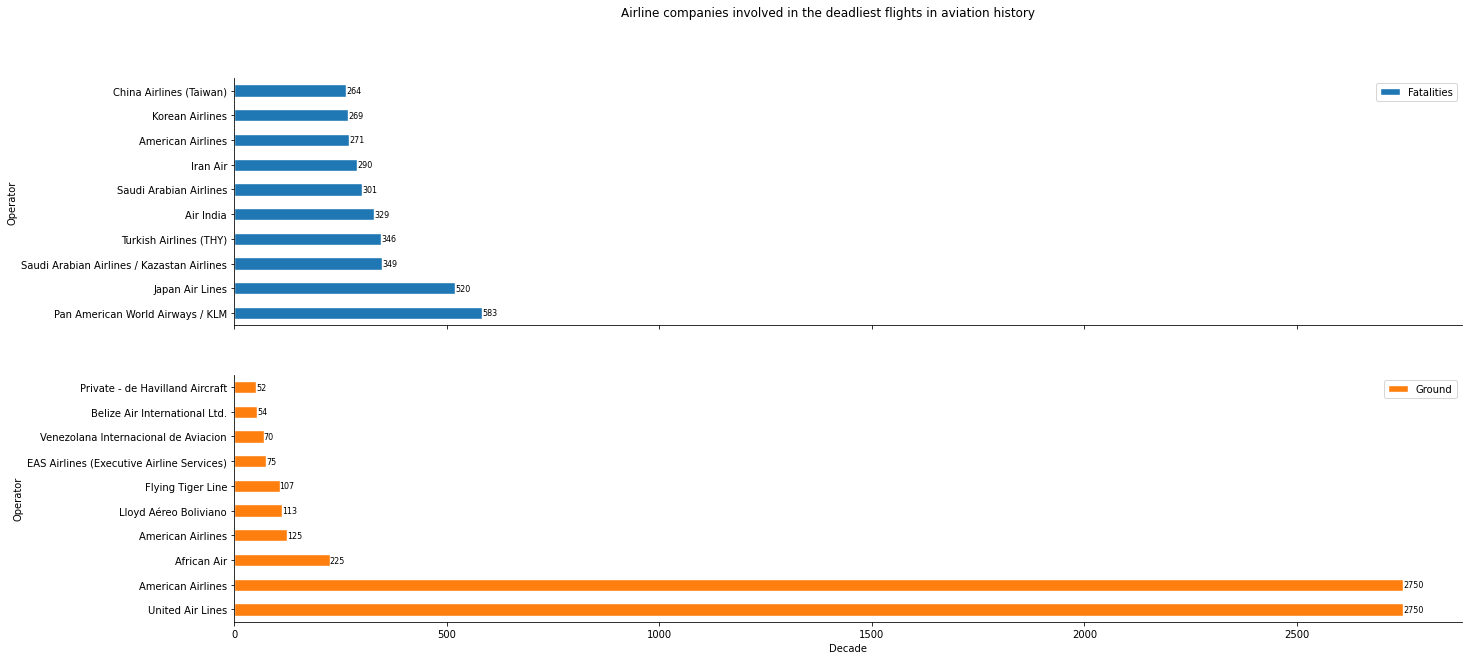

In [20]:


N_RANGE = 10


def plot_deadliest_flights(df: pd.DataFrame, column: str, subject: str):

    def start_plotting(df_sorted_by_fatalities: pd.DataFrame, df_sorted_by_ground: pd.DataFrame, column: str, subject: str):

        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(22, 10), sharex=True)

        fig.suptitle(
            f"{subject} involved in the deadliest flights in aviation history")

        bar_plot(df_sorted_by_fatalities, column,  ["Fatalities"],
                 ax1, "Decade", [Color.DEFAULT_BLUE.value], isHorizontal=True)

        bar_plot(df_sorted_by_ground, column,  ["Ground"],
                 ax2, "Decade", [Color.DEFAULT_ORANGE.value], isHorizontal=True)

    choosed_df = df.loc[df["passenger_type"] ==
                        Passenger.CIVIL.value] if column == "Operator" else df

    df_sorted_by_fatalities = choosed_df.sort_values(
        by="Fatalities", ascending=False).head(N_RANGE)

    df_sorted_by_ground = choosed_df.sort_values(
        by="Ground", ascending=False).head(N_RANGE)

    start_plotting(df_sorted_by_fatalities,
                   df_sorted_by_ground, column, subject)


plot_deadliest_flights(df, "Operator", "Airline companies")


These histograms show the airlines with the most cumulative deaths. As said before, these data are to be put into perspective in relation to the number of real flights. Nevertheless, we can see that Aeroflot clearly stands out from other airlines in terms of incidents.

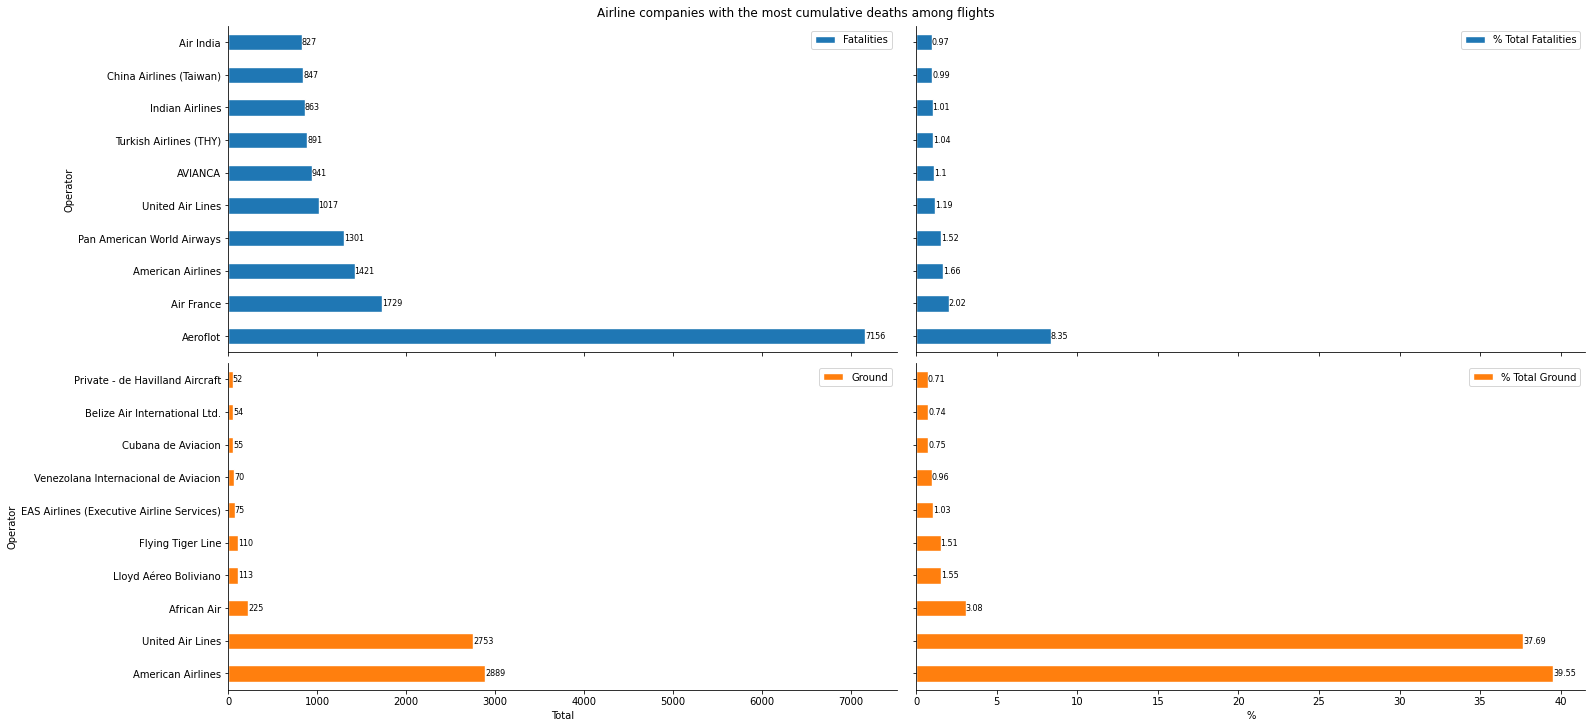

In [21]:

def group_by_column_get_stats(df: pd.DataFrame, groupBy: str, sortBy1: str, sortBy2: str):

    df_group_by_column = df.groupby(by=groupBy).agg(
        {"Aboard": ["count", "sum"], "Fatalities": ["count", "sum"], "Ground": ["count", "sum"]})

    df_group_by_column[f"percentage_{sortBy1.lower()}"] = (
        (df_group_by_column[(sortBy1, "sum")].divide(df_group_by_column[(sortBy1, "sum")].sum()) * 100).round(2))

    df_group_by_column["survival_rate"] = (
        (100 - (df_group_by_column[("Fatalities", "sum")].divide(df_group_by_column[("Aboard", "sum")]).round(2) * 100)))

    df_group_by_columnn_sorted = df_group_by_column.sort_values(
        by=(sortBy1, sortBy2), ascending=False)

    return df_group_by_columnn_sorted


def plot_most_cumulative_deaths(df: pd.DataFrame, column: str, subject: str):

    def start_plotting(df_sort_by_fatalities_sum: pd.DataFrame, df_sort_by_ground_sum: pd.DataFrame, subject: str):

        fig = plt.figure(figsize=(22, 10), constrained_layout=True)

        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2, sharey=ax1)

        ax3 = fig.add_subplot(2, 2, 3, sharex=ax1)
        ax4 = fig.add_subplot(2, 2, 4, sharex=ax2, sharey=ax3)

        title = f"{subject} with the most cumulative deaths among flights"

        fig.suptitle(title)

        bar_plot(df_sort_by_fatalities_sum, None, [("Fatalities", "sum")],
                 ax1, "Total", [Color.DEFAULT_BLUE.value], isHorizontal=True)
        bar_plot(df_sort_by_fatalities_sum, None, ["percentage_fatalities"],
                 ax2, "%", [Color.DEFAULT_BLUE.value], isHorizontal=True)

        bar_plot(df_sort_by_ground_sum, None, [("Ground", "sum")],
                 ax3, "Total", [Color.DEFAULT_ORANGE.value], isHorizontal=True)
        bar_plot(df_sort_by_ground_sum, None, ["percentage_ground"],
                 ax4, "%", [Color.DEFAULT_ORANGE.value], isHorizontal=True)

        ax1.legend(["Fatalities"])
        ax2.legend(["% Total Fatalities"])

        ax3.legend(["Ground"])
        ax4.legend(["% Total Ground"])

    choosed_df = df.loc[df["passenger_type"] ==
                        Passenger.CIVIL.value] if column == "Operator" else df

    df_sort_by_fatalities_sum = group_by_column_get_stats(
        choosed_df, column, "Fatalities", "sum")
    df_sort_by_ground_sum = group_by_column_get_stats(
        choosed_df, column, "Ground", "sum")

    start_plotting(df_sort_by_fatalities_sum.head(
        N_RANGE), df_sort_by_ground_sum.head(N_RANGE), subject)


plot_most_cumulative_deaths(df, "Operator", "Airline companies")






On these histograms, we can see a comparison between the companies with the most cumulative deaths and those with the most incidents. We can also see the number of incidents and the survival rate for each company. We can see that some companies have very few incidents, but a very low survival rate (Air India) and others with more incidents and a higher survival rate (United Airlines). However, we can see that Aeroflot has both a high mortality rate, a high number of incidents and a low survival rate.


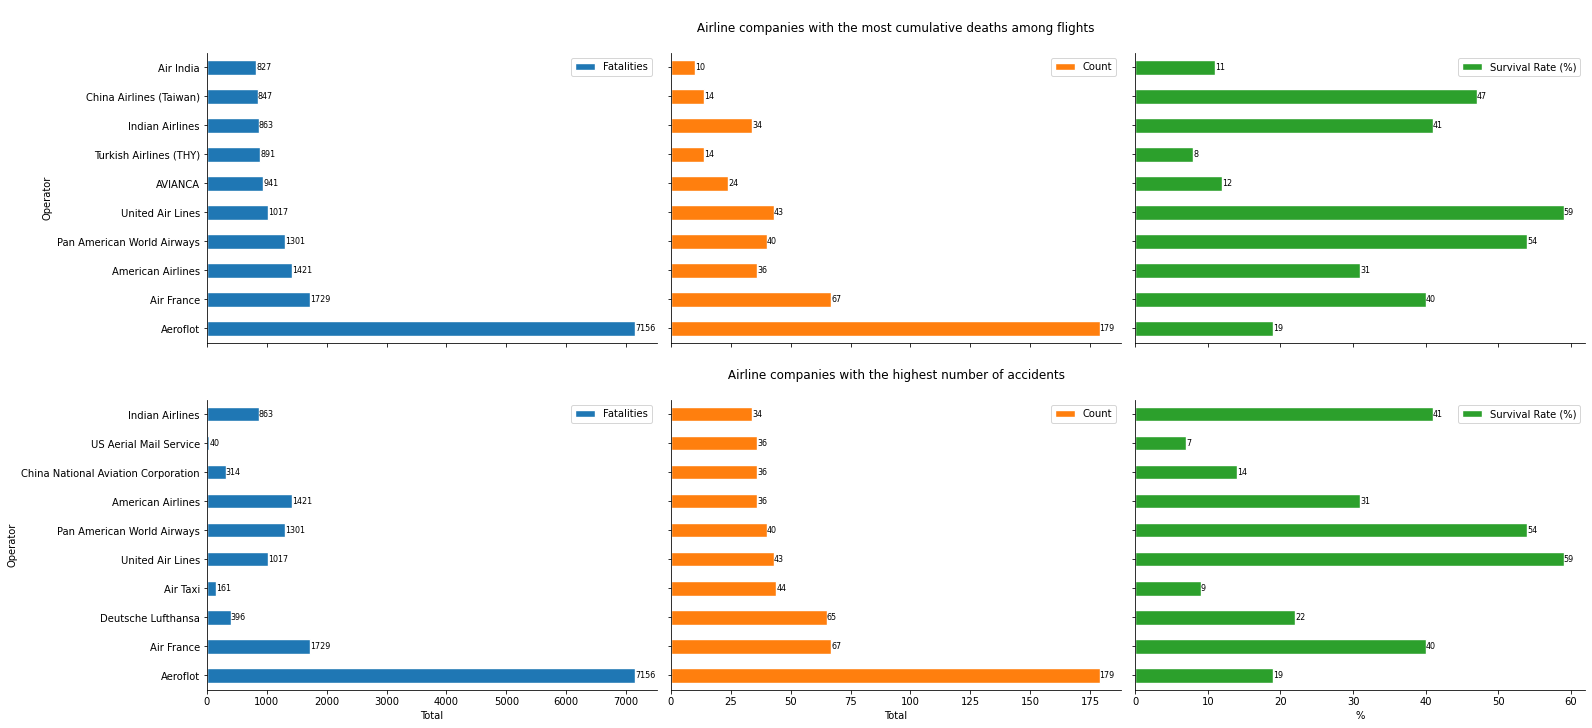

In [22]:
def plot_most_cumulative_deaths_details(df: pd.DataFrame, column: str, subject: str):

    def start_plotting(df_sort_by_fatalities_sum: pd.DataFrame, df_sort_by_fatalities_count: pd.DataFrame, subject: str):

        fig = plt.figure(figsize=(22, 10), constrained_layout=True)

        ax1 = fig.add_subplot(2, 3, 1)
        ax2 = fig.add_subplot(2, 3, 2, sharey=ax1)
        ax3 = fig.add_subplot(2, 3, 3, sharey=ax1)

        ax4 = fig.add_subplot(2, 3, 4, sharex=ax1)
        ax5 = fig.add_subplot(2, 3, 5, sharex=ax2, sharey=ax4)
        ax6 = fig.add_subplot(2, 3, 6, sharex=ax3, sharey=ax4)

        bar_plot(df_sort_by_fatalities_sum, None, [("Fatalities", "sum")],
                 ax1, "Total", [Color.DEFAULT_BLUE.value], isHorizontal=True)

        bar_plot(df_sort_by_fatalities_sum, None, [("Fatalities", "count")],
                 ax2, "Total", [Color.DEFAULT_ORANGE.value], isHorizontal=True)

        bar_plot(df_sort_by_fatalities_sum, None, ["survival_rate"],
                 ax3, "%", [Color.DEFAULT_GREEN.value], isHorizontal=True)

        bar_plot(df_sort_by_fatalities_count, None, [("Fatalities", "sum")],
                 ax4, "Total", [Color.DEFAULT_BLUE.value], isHorizontal=True)
        bar_plot(df_sort_by_fatalities_count, None, [("Fatalities", "count")],
                 ax5, "Total", [Color.DEFAULT_ORANGE.value], isHorizontal=True)

        bar_plot(df_sort_by_fatalities_count, None, ["survival_rate"],
                 ax6, "%", [Color.DEFAULT_GREEN.value], isHorizontal=True)

        ax1.legend(["Fatalities"])
        ax2.legend(["Count"])
        ax2.title.set_text(
            f"\n {subject} with the most cumulative deaths among flights \n")
        ax3.legend(["Survival Rate (%)"])

        ax4.legend(["Fatalities"])
        ax5.legend(["Count"])
        ax5.title.set_text(
            f"\n {subject} with the highest number of accidents \n")
        ax6.legend(["Survival Rate (%)"])

    choosed_df = df.loc[df["passenger_type"] ==
                        Passenger.CIVIL.value] if column == "Operator" else df

    df_sort_by_fatalities_sum = group_by_column_get_stats(
        choosed_df, column, "Fatalities", "sum")

    df_sort_by_fatalities_count = group_by_column_get_stats(
        choosed_df, column, "Fatalities", "count")

    start_plotting(df_sort_by_fatalities_sum.head(
        N_RANGE), df_sort_by_fatalities_count.head(N_RANGE), subject)


plot_most_cumulative_deaths_details(df, "Operator", "Airline companies")


These dot plots really do allow you to reference the deadly flights of the companies with the most cumulative deaths. This does not use ground fatality data, so these are purely points related to passenger fatalities. We can see in particular that some airlines had a lot of small incidents during the early days of civil aviation (United Airlines, Pan American World Airways) but then had more rare and deadly incidents (increase in the number of passengers per plane). Air India seems to have had very few incidents, but some very deadly ones.

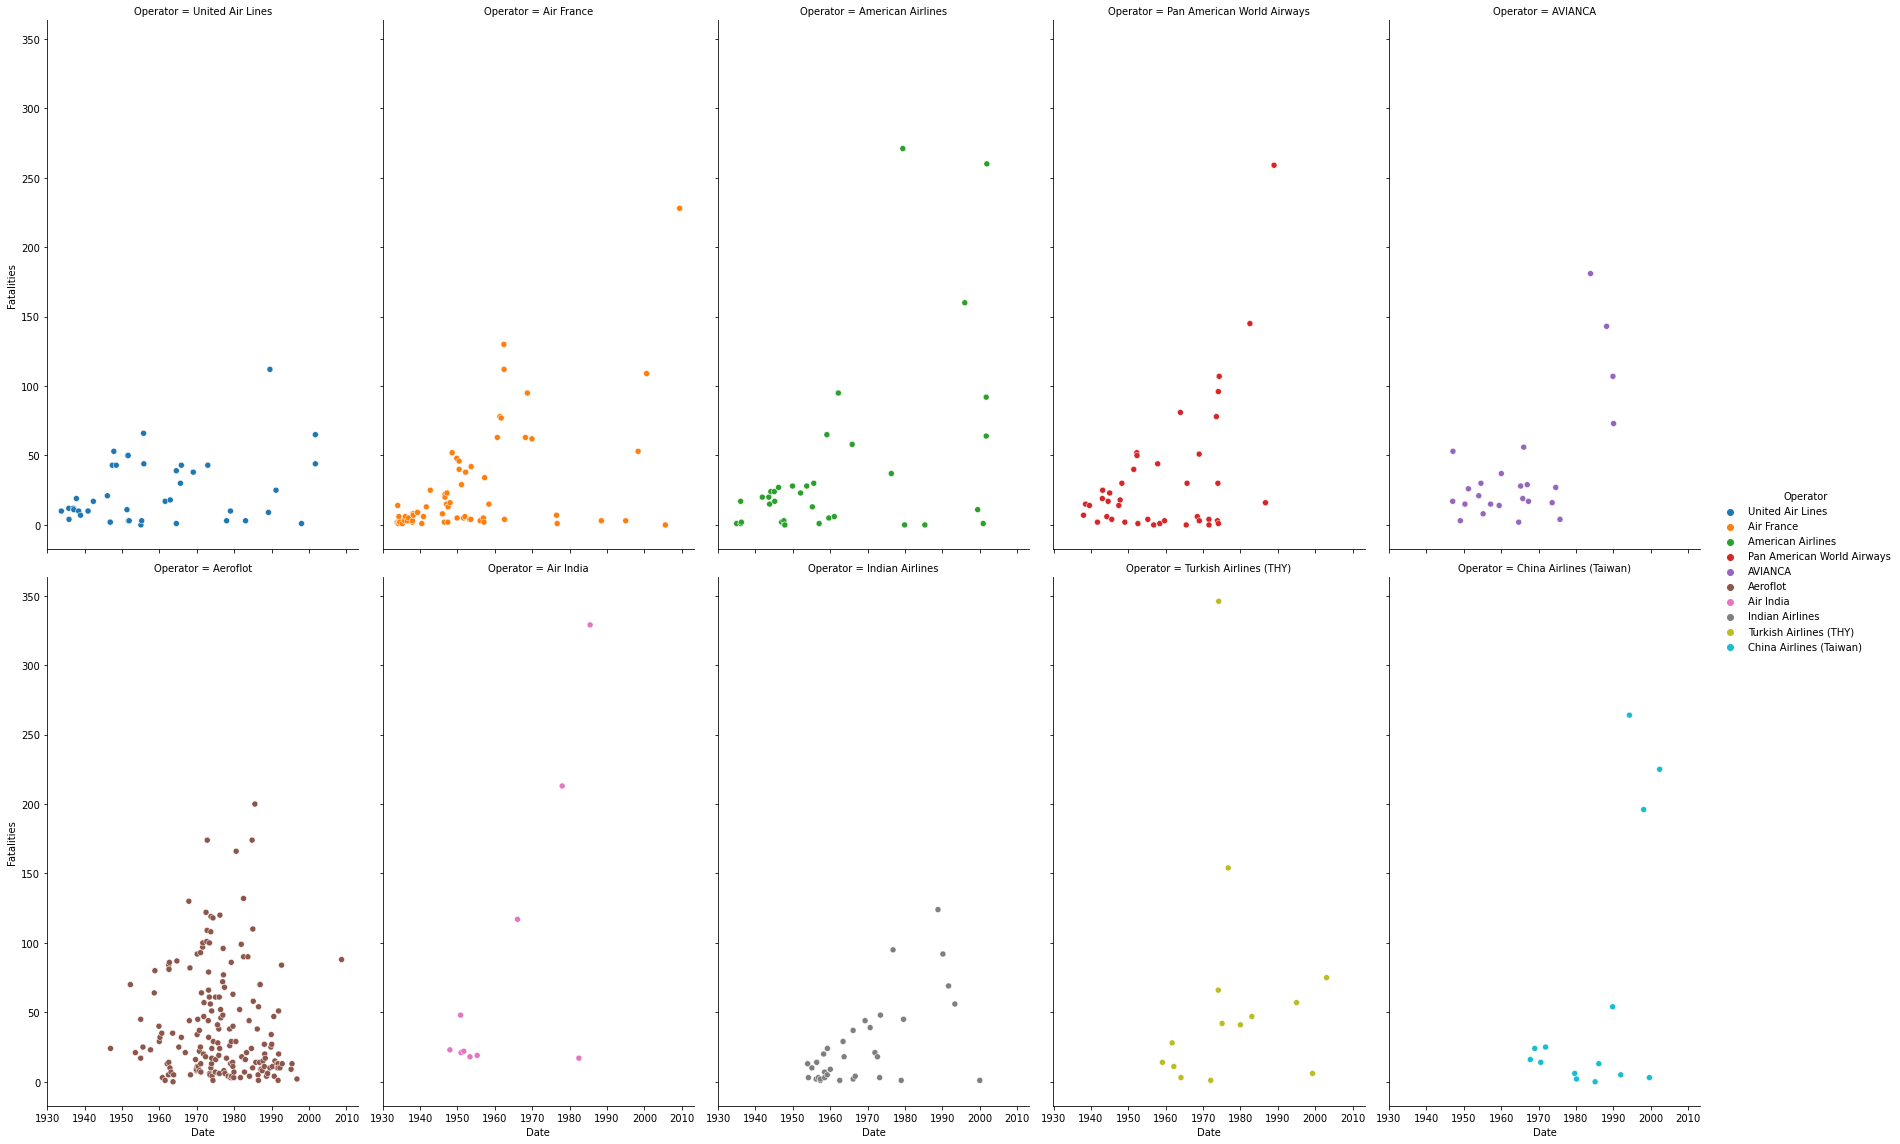

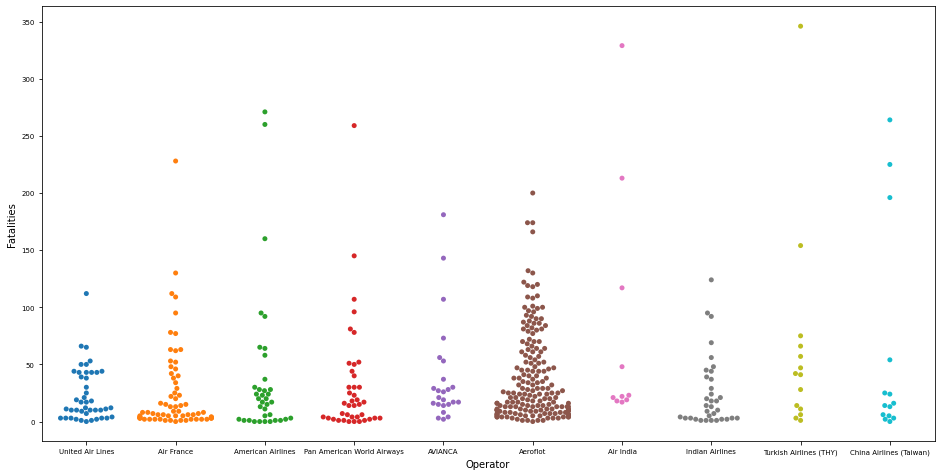

In [23]:

import warnings

def swarmplot_biggest_fatalities(df: pd.DataFrame, column: str):

    def start_plotting(df_biggest_fatalities: pd.DataFrame, column: str):

        sns.relplot(data=df_biggest_fatalities,
                    x="Date", y="Fatalities", hue=column, height=8, col_wrap=5, aspect=0.6, col=column)

        fig, (ax1) = plt.subplots(figsize=(16, 8))

        ax1.tick_params("x", labelsize=7)
        ax1.tick_params("y", labelsize=7)

        ax1.set_xlabel(column, fontsize=10)
        ax1.set_ylabel("Fatalities", fontsize=10)



        with warnings.catch_warnings(record=True):

            sns.swarmplot(data=df_biggest_fatalities,
                      x=column, y="Fatalities", ax=ax1)

    choosed_df = df.loc[df["passenger_type"] ==
                        Passenger.CIVIL.value] if column == "Operator" else df

    df_sort_by_fatalities_sum = group_by_column_get_stats(
        choosed_df, column, "Fatalities", "sum")

    biggest_fatalities = list(
        df_sort_by_fatalities_sum.head(N_RANGE).index)

    df_biggest_fatalities = df.loc[df[column].isin(
        biggest_fatalities)]

    start_plotting(df_biggest_fatalities, column)


swarmplot_biggest_fatalities(df, "Operator")


On these sections, we will perform the same plots as for the airlines, but this time with the aircraft models. Unlike the previous plots, this time I use military flight data. I reuse the same functions as before with the difference that I group the data by the column "Type" and not "Operator". 

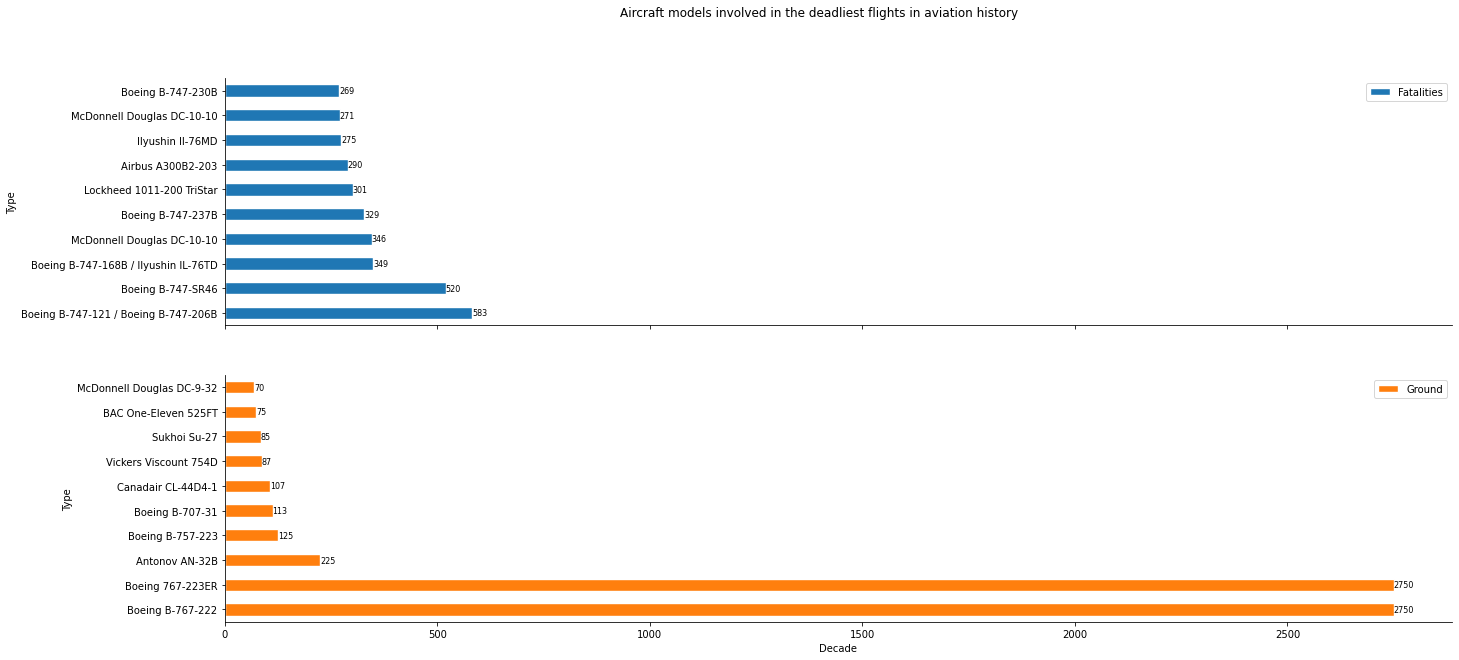

In [24]:
plot_deadliest_flights(df, "Type", "Aircraft models")

Here, we can see that the Douglas DC-3 is the aircraft model that has had the most incidents. The Douglas and McDonnell Douglas manufactures seem to have had the most incidents. 

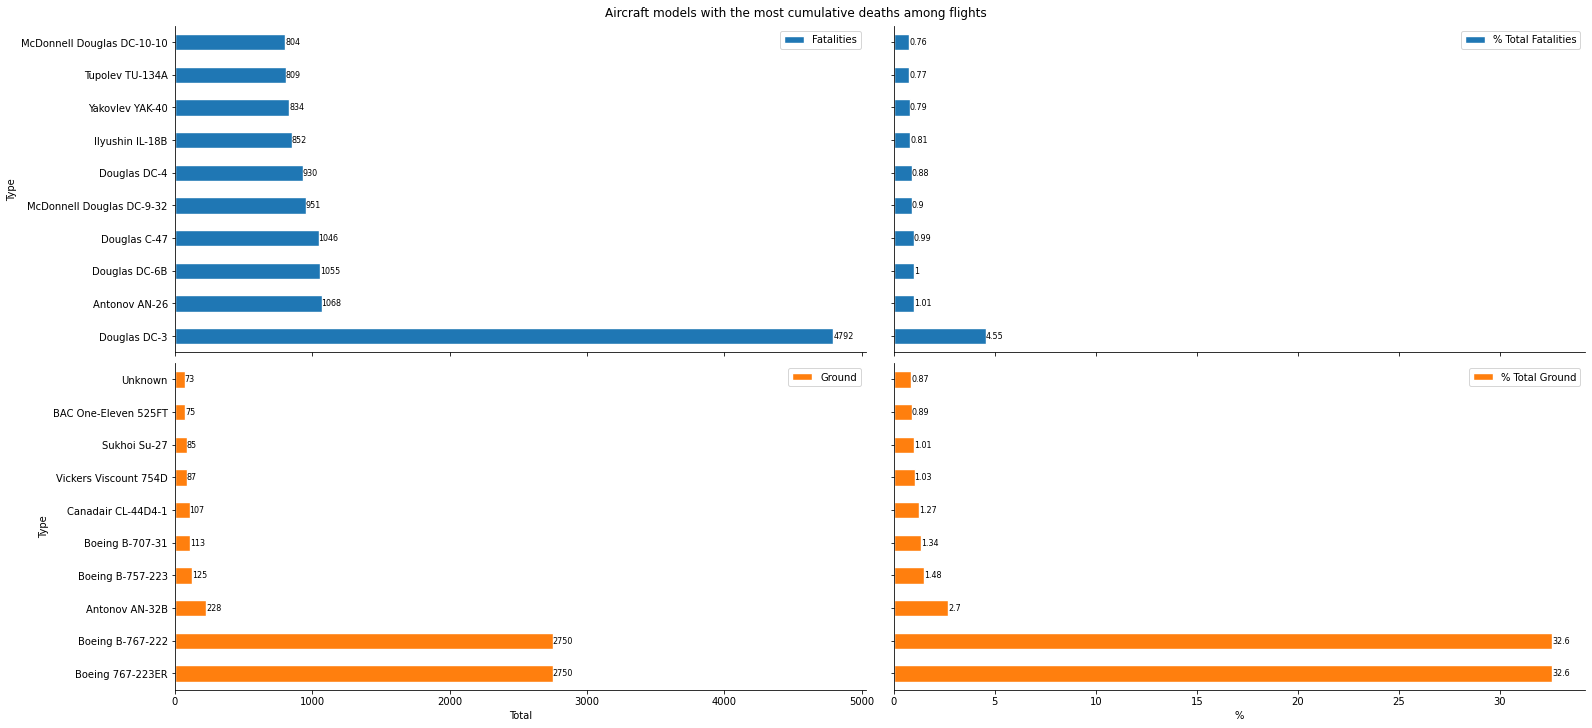

In [25]:


plot_most_cumulative_deaths(df, "Type", "Aircraft models")


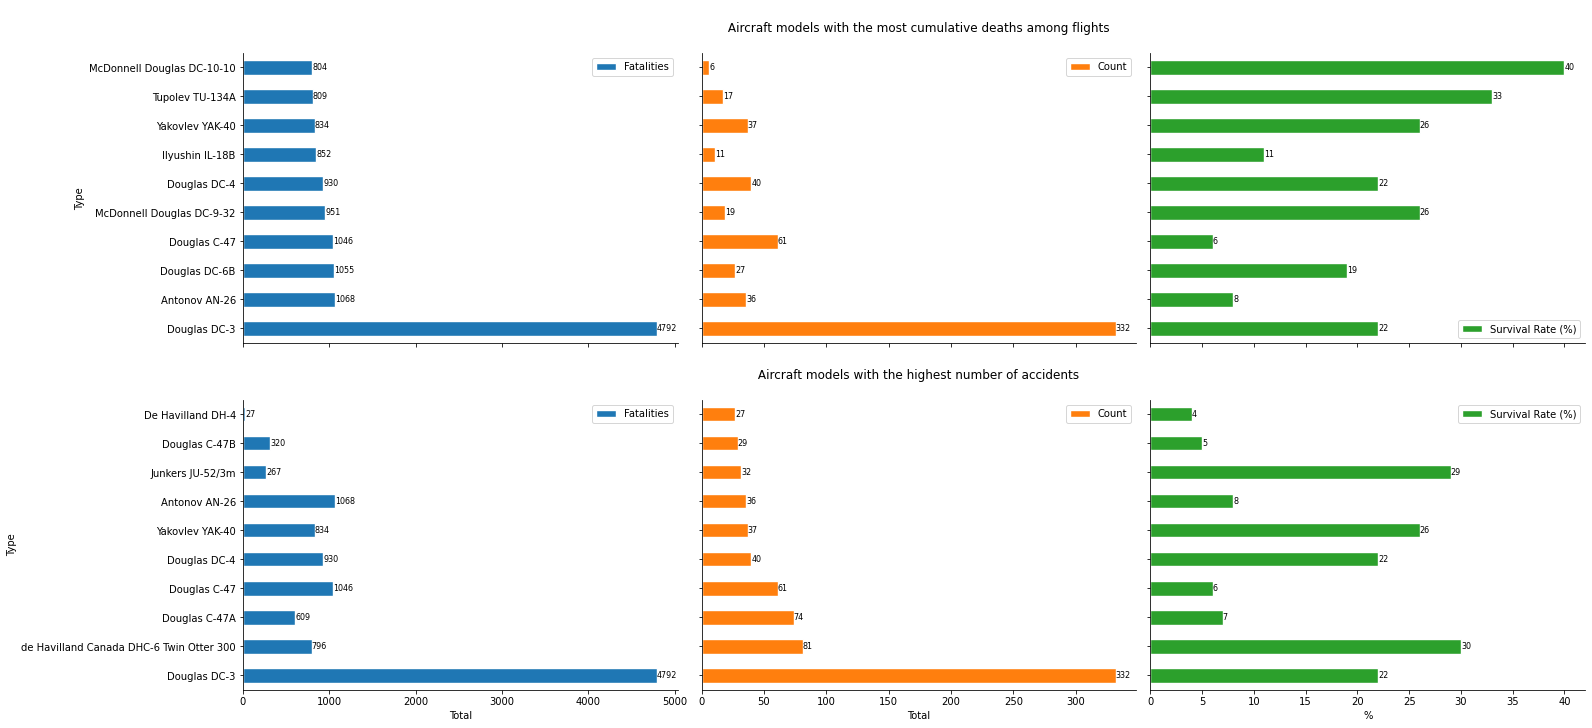

In [26]:
plot_most_cumulative_deaths_details(df, "Type", "Aircraft models")


These plots of points highlight the number of passengers of the model of plane, without knowing the model, we can see that Douglas DC-3 is a plane with a low number of passengers, we can see that it had a very great number of incidents during these years in service. The McDonnell Douglas DC-10-10 had few incidents, but two very deadly ones.

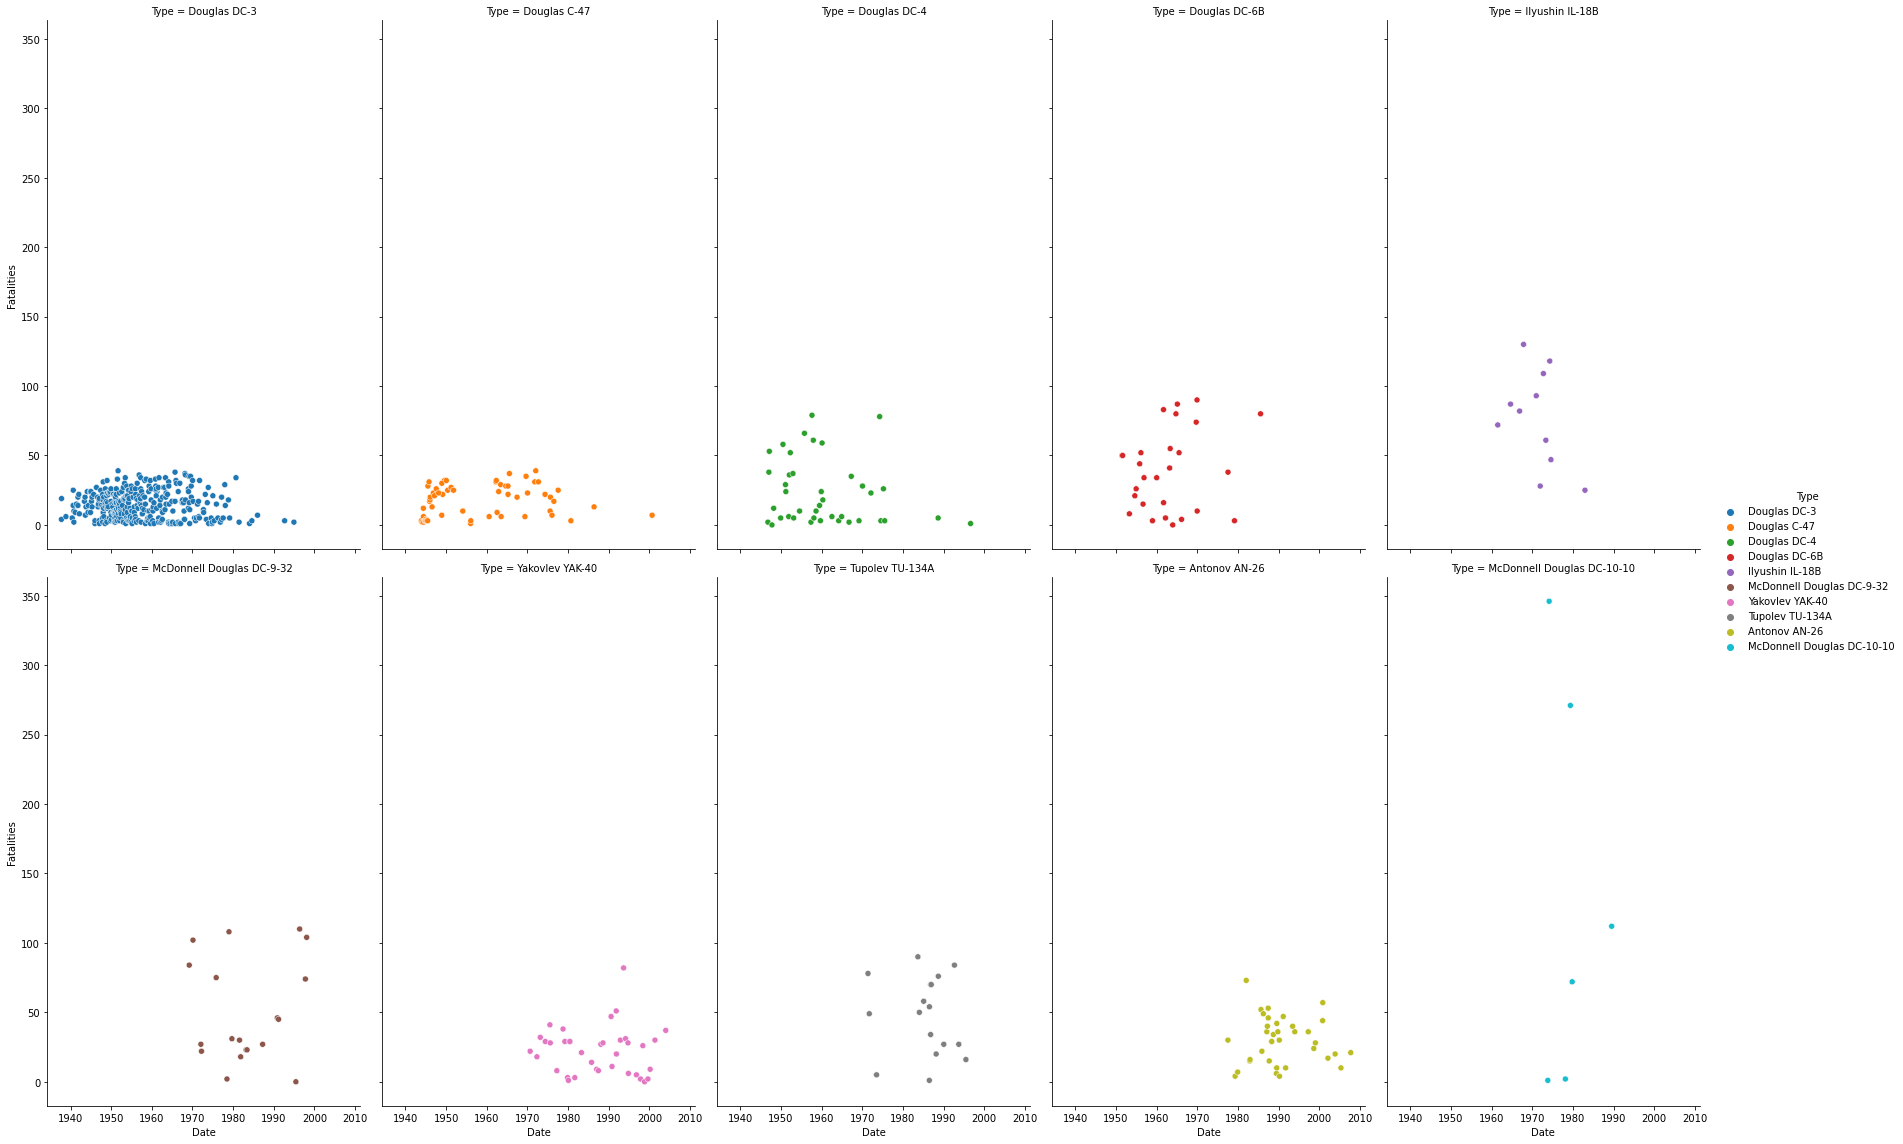

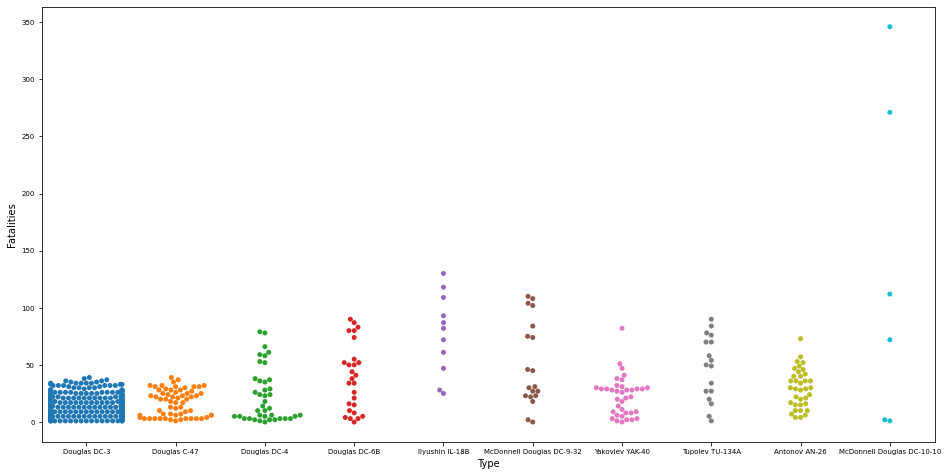

In [27]:
swarmplot_biggest_fatalities(df, "Type")


In [28]:

AIRBUS = "Airbus"
BOEING = "Boeing"
OTHER = "Other"

conditions = [
    (df["Type"].str.contains("Airbus", regex=True)),
    (df["Type"].str.contains("Boeing", regex=True))
]

choices = [AIRBUS, BOEING]

df["plane_type"] = np.select(conditions, choices, default=OTHER)



It may not be fair to make a comparison between Boeing and Airbus as Boeing is an older company than Airbus with many more reported incidents. However, the plots are still quite interesting. We can see that Boeing represents about 18% of the total number of fatalities in terms of proportions.

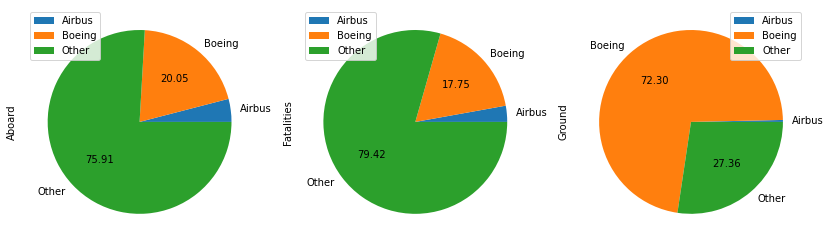

In [29]:


def plot_plane_type_pie(df: pd.DataFrame):

    df_group_by_plane_type = df.groupby(
        by="plane_type").sum()

    df_group_by_plane_type.plot.pie(
        subplots=True, figsize=(14, 6), autopct=autopct)


plot_plane_type_pie(df)




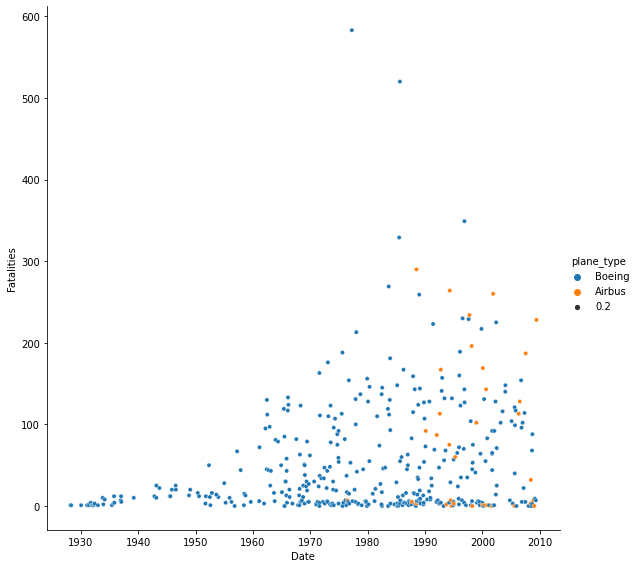

In [30]:


def plot_evolution_of_deaths_each_year_plane_type(df: pd.DataFrame):

    df_plane_type_airbus_boeing = df.loc[(
        df["plane_type"] == AIRBUS) | (df["plane_type"] == BOEING)]

    sns.relplot(data=df_plane_type_airbus_boeing,
                x="Date", y="Fatalities", hue="plane_type", height=8, size=0.2)


plot_evolution_of_deaths_each_year_plane_type(df)


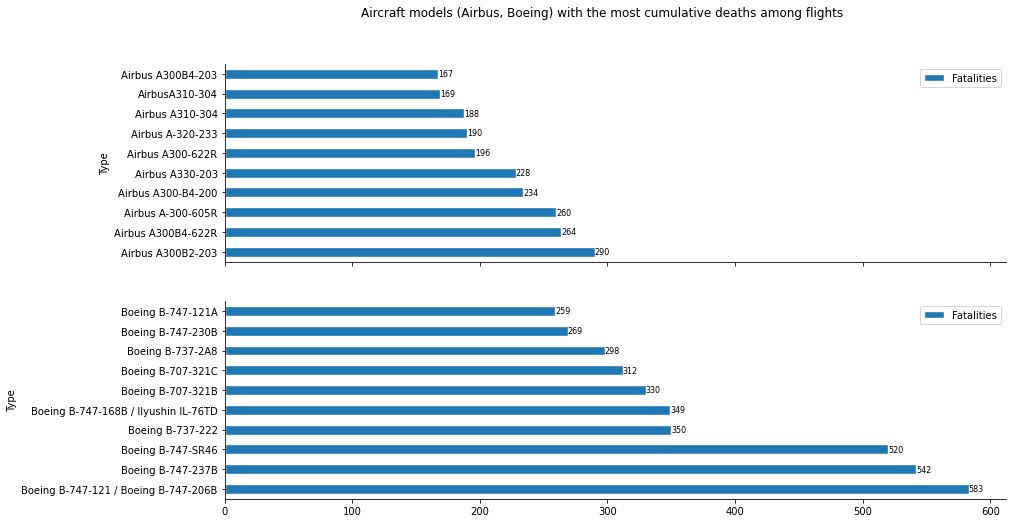

In [31]:


def plot_most_cumulative_deaths_plane_type(df: pd.DataFrame):

    def start_plotting(df_airbus_fatalities: pd.DataFrame,  df_boeing_fatalities: pd.DataFrame):

        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14, 8), sharex=True)
        fig.suptitle(
            "Aircraft models (Airbus, Boeing) with the most cumulative deaths among flights")

        bar_plot(df_airbus_fatalities.head(N_RANGE), None, ["Fatalities"],
                 ax1, None, [Color.DEFAULT_BLUE.value], isHorizontal=True)

        bar_plot(df_boeing_fatalities.head(N_RANGE), None, ["Fatalities"],
                 ax2, None, [Color.DEFAULT_BLUE.value], isHorizontal=True)

    df_plane_type_airbus = df.loc[(
        df["plane_type"] == AIRBUS)]

    df_plane_type_boeing = df.loc[(
        df["plane_type"] == BOEING)]

    df_group_by_type_airbus = df_plane_type_airbus.groupby(
        "Type").sum()

    df_group_by_type_boeing = df_plane_type_boeing.groupby(
        "Type").sum()

    df_airbus_fatalities = df_group_by_type_airbus.sort_values(
        by="Fatalities", ascending=False)

    df_boeing_fatalities = df_group_by_type_boeing.sort_values(
        by="Fatalities", ascending=False)

    start_plotting(df_airbus_fatalities,
                   df_boeing_fatalities)


plot_most_cumulative_deaths_plane_type(df)
